# Score analysis

## Task 1 

In [10]:
import pandas as pd
import statistics as st
scores_df=pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
scores_df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [11]:
Mean = [ ]
Median = [ ]
Mode = [ ]

#Iterating each column of dataframe
for i in scores_df:
    Mean.append(scores_df.loc[:,i].mean()) 
    Median.append(scores_df.loc[:,i].median()) 
    Mode.append(st.mode(scores_df[i]))
    
row_head=['Mean','Median','Mode']
col_names=['Statistics','Python','Tableau']


In [13]:
score_data=pd.DataFrame([Mean, Median, Mode],columns=col_names)
score_data.insert(0, "Measures", row_head, True)

score_data

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


Conclusion - Imported the data into a dataframe and found mean,median and more for the data.

## Task 2 

In [18]:
Mean=[]
SD=[]
CV=[]

for i in scores_df:
    col_mean=scores_df.loc[:,i].mean() 
    Mean.append(col_mean) 
    col_sd=scores_df.loc[:,i].std()  
    SD.append(col_sd) 
    CV.append(col_sd/col_mean*100) 
    
row_head=['Mean','Standard Deviation','Coefficient of Variation']
col_names=['Statistics','Python','Tableau']


scores_data2=pd.DataFrame([Mean, SD, CV],columns=col_names)


scores_data2.insert(0, "Measures", row_head, True)
scores_data2

,Measures,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Standard Deviation,7.236126,4.345484,7.320899
2,Coefficient of Variation,11.883931,5.309731,10.762862


Conclusion - Found the measures like mean,SD and Coefficient of varience for the data.

## Task 3 

In [30]:
for subject in scores_df:
    LO=[]#Lower Outliers list
    UO=[]#Upper Outliers list
    subject_series=pd.Series(scores_df[subject]) #Converting each column values into pandas series
    
    Min=min(subject_series) #Calculating minimum value
    Max=max(subject_series) #Calculating maximum value
    Range=Max-Min #Calculating range
    
    Q1=subject_series.quantile(0.25) #Calculating quartile 1
    Q3=subject_series.quantile(0.75) #Calculating quartile 3
    IQR=Q3-Q1 #Calculating inter quartile range
    UF=Q3+1.5*IQR #Calculating upper fence
    LF=Q1-1.5*IQR #Calculating lower fence
    
    # The rule of 1.5 * IQR 
    # (IQR*1.5) = k 
    # Any point beyond Q3+k is an outlier 
    # Any point beyond Q1-k is an outlier 
    for i in scores_df[subject]:
        if(i<LF):
            LO.append(i)
        if(i>UF):
            UO.append(i)
    
    #Storing all above the calculated minimum, maximum, range, Q1, Q3, IQR, 
    #upper fence, lower fence, and outliers into respective lists
    if(subject=="Statistics"):
        Statistics=['Statistics',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(subject=="Python"):
        Python=['Python',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    else:
        Tableau=['Tableau',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]] 
        
col_names=['subject','Min','Max','Range','Q1','Q3','IQR','Lower Fence', 'Upper Fence','Outliers']
#Creating a new dataframe with all calculated values of 3 companies
d_data=pd.DataFrame([Statistics,Python,Tableau],columns=col_names)
d_data

,subject,Min,Max,Range,Q1,Q3,IQR,Lower Fence,Upper Fence,Outliers
0,Statistics,50,74,24,54.0,67.00,13.00,34.500,86.500,"[[], []]"
1,Python,75,89,14,78.0,86.00,8.00,66.000,98.000,"[[], []]"
2,Tableau,45,79,34,64.0,73.25,9.25,50.125,87.125,"[[45, 50, 50, 50, 46, 46], []]"


Conclusion - Found the skewness of the data by finding the details of min,max,range,Q1,Q3,IQR etc

## Task 4 

In [32]:
import matplotlib.pyplot as plt

#Separting each company's salary in different list
Statistics_data=scores_df['Statistics'].tolist()
Python_data=scores_df['Python'].tolist()
Tableau_data=scores_df['Tableau'].tolist()

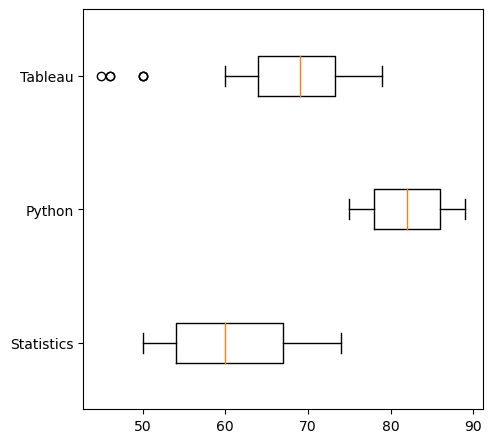

In [34]:
#Setting figure size
fig = plt.figure(figsize =(4, 4))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#Creating boxplots of 3 groups of salaries
plt.boxplot([Statistics_data,Python_data,Tableau_data],vert=0)

#Setting y-axis label
ax.set_yticklabels(['Statistics','Python','Tableau'])

#Showing the final plot
plt.show()

Conclusion - The distribution of scores in all 3 subject is visuallised in a box chart.it is found that Tableau is more skewed and has outliners.

## Task 5 

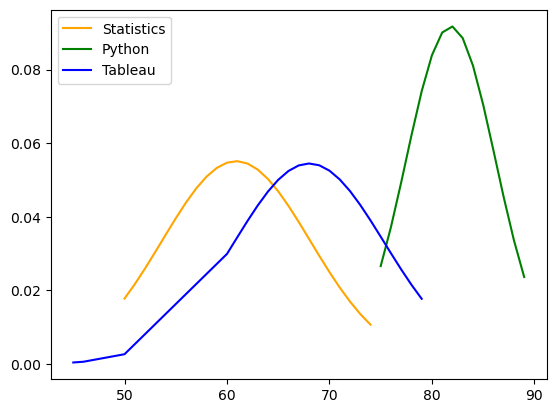

In [39]:
from scipy.stats import norm

#Sorting data
Statistics_data=sorted(Statistics_data)
Python_data=sorted(Python_data)
Tableau_data=sorted(Tableau_data)

# Calculating mean and standard deviation
S_mean = st.mean(Statistics_data)
S_sd = st.stdev(Statistics_data)
P_mean = st.mean(Python_data)
P_sd = st.stdev(Python_data)
T_mean = st.mean(Tableau_data)
T_sd = st.stdev(Tableau_data)

#Drawing plots using sorted data and normalized data
plt.plot(Statistics_data, norm.pdf(Statistics_data, S_mean, S_sd), color='orange', label='Statistics')
plt.plot(Python_data, norm.pdf(Python_data, P_mean, P_sd),color='green', label='Python')
plt.plot(Tableau_data, norm.pdf(Tableau_data, T_mean, T_sd), color='blue', label='Tableau')

#Attaching legend
plt.legend()

#Showing the final plot
plt.show()

In [42]:
from scipy.stats import kurtosis 

print("Kurtosis of Statistics :",kurtosis(Statistics_data))
print("Kurtosis of Python :",kurtosis(Python_data))
print("Kurtosis of Tableau :",kurtosis(Tableau_data))

Kurtosis of Statistics : -1.2890343729055107
Kurtosis of Python : -1.2748529079288784
Kurtosis of Tableau : 1.442459054422362


Conclusion - The distribution of data of each subject is represented using curve and kurtosis report is shown.